In [2]:
!pip install xgboost

In [3]:
!pip install lightgbm

In [4]:
!pip install wordcloud

In [5]:
import pandas as pd
import itertools
from sklearn.metrics import classification_report , confusion_matrix,accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from lightgbm import LGBMClassifier
import os
import seaborn as sns
from wordcloud import WordCloud

In [6]:
df=pd.read_csv('malicious_phish.csv.zip')
print(df.shape)
df.head()

(651191, 2)


url        type
0                                   br-icloud.com.br    phishing
1                mp3raid.com/music/krizz_kaliko.html      benign
2                    bopsecrets.org/rexroth/cr/1.htm      benign
3  http://www.garage-pirenne.be/index.php?option=...  defacement
4  http://adventure-nicaragua.net/index.php?optio...  defacement

In [7]:
df.type.value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

## Plotting Wordcloud


In [9]:
phish=df[df.type=='phishing']
malware=df[df.type=='malware']
deface=df[df.type=='defacement']
benign=df[df.type=='benign']

In [10]:
phish_urls="".join(i for i in phish.url)
wordcloud=WordCloud(width=1000,height=700,colormap='Paired').generate(phish_urls)
plt.figure(figsize=(10,12),facecolor='m')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [11]:
malware_urls="".join(i for i in malware.url)
wordcloud=WordCloud(width=1000,height=800,colormap='Paired').generate(malware_urls)
plt.figure(figsize=(10,12),facecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

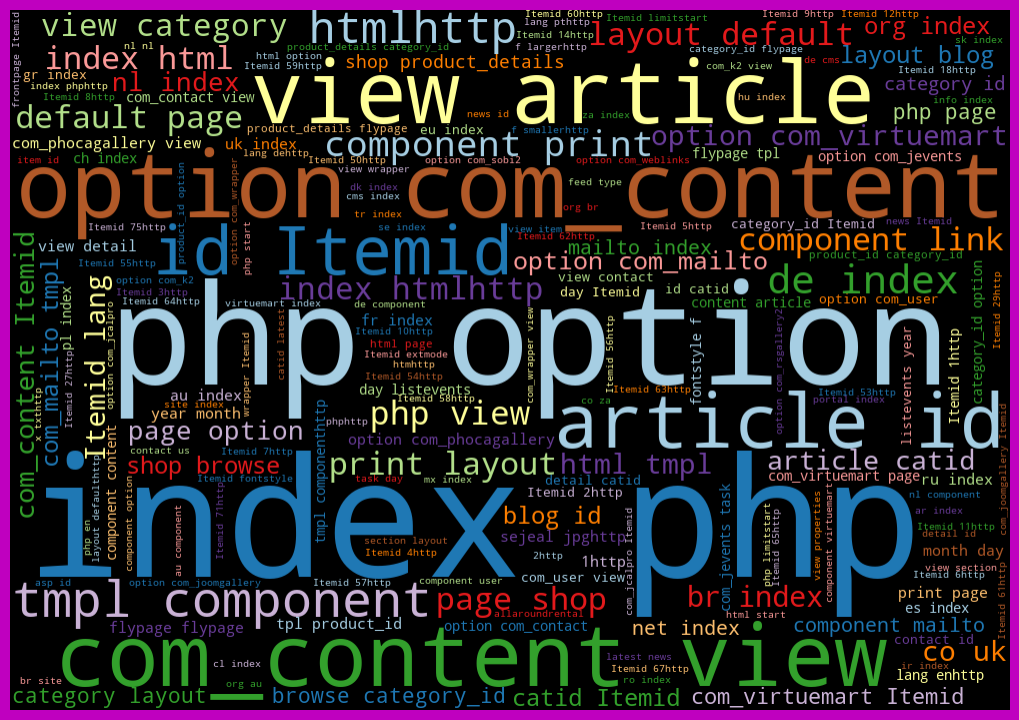

In [12]:
deface_urls="".join(i for i in deface.url)
wordcloud=WordCloud(width=1000,height=700,colormap='Paired').generate(deface_urls)
plt.figure(figsize=(10,12),facecolor='m')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

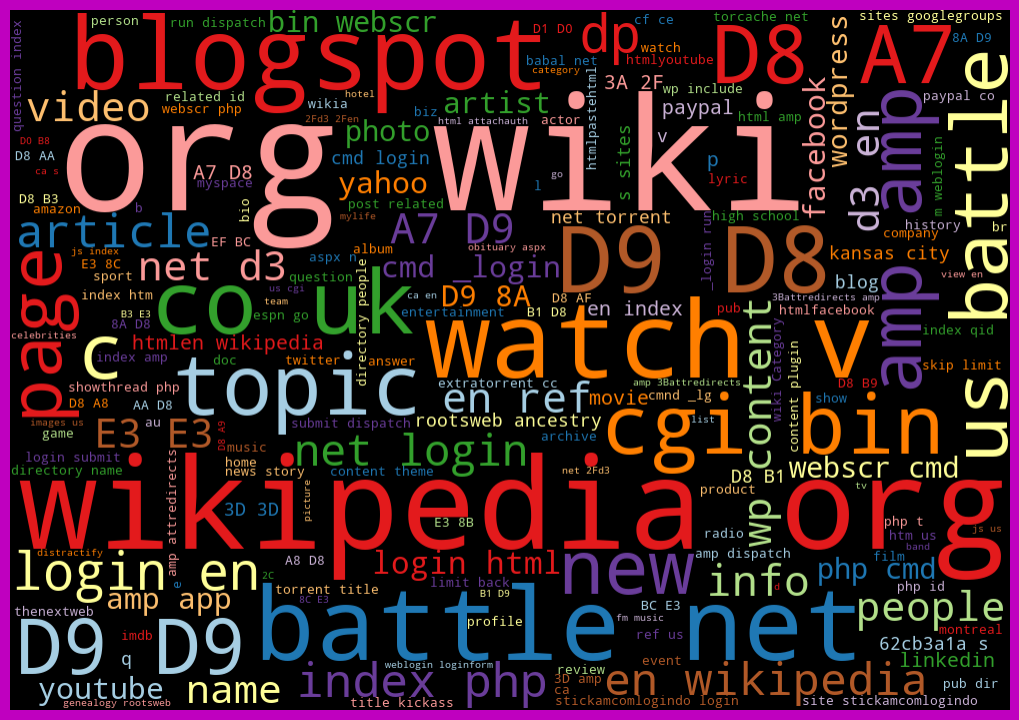

In [13]:
benign_urls="".join(i for i in benign.url)
wordcloud=WordCloud(width=1000,height=700,colormap='Paired').generate(benign_urls)
plt.figure(figsize=(10,12),facecolor='m')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Feature Engineering 

import re

def having_ip_address(url): 
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01?\\d\\?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'     
        '([01]?\\d\\?|2[0-4]\\d|25[0-5])\\/)|' #ipv4
        '(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA]-F){1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'
        '(?:[a-fA-F0-9]{1,4}:{7}[a-fA-F0-9]{1,4}',url) #ipv6
    if match : 
        return 1        # (print match.group())
    else : 
        return 0          # (No matching pattern found)
        
df['use_of_ip']=df['url'].apply(lambda i: having_ip_address(i))
     
             
    
                        


In [16]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [17]:
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname,url)
    if match: 
        return 1 
    else:
        return 0 

df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [18]:
!pip install googlesearch-python

In [19]:
from googlesearch import search 

In [20]:
def google_index(url):
    site=search(url,5)
    return 1 if site else 0 
df['google_index']=df['url'].apply(lambda i : google_index(i))

In [21]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot
df['count.']= df['url'].apply(lambda i: count_dot(i))
df.head()

url        type  use_of_ip  \
0                                   br-icloud.com.br    phishing          0   
1                mp3raid.com/music/krizz_kaliko.html      benign          0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0   
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0   

   abnormal_url  google_index  count.  
0             0             1       2  
1             0             1       2  
2             0             1       2  
3             1             1       3  
4             1             1       2

In [22]:
def count_www(url):
    url.count('www')
    return url.count('www')
df['count-www']=df['url'].apply(lambda i: count_www(i))

def count_atrate(url):
    return url.count('@')
df['count@']=df['url'].apply(lambda i: count_atrate(i))

def no_of_dir(url):
    urldir=urlparse(url).path
    return urldir.count('/')
df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir=urlparse(url).path
    return urldir.count('//')
df['count_embed_domain']=df['url'].apply(lambda i:no_of_embed(i))

def shortening_service(url):
    
    match = re.search(r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      r'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      r'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      r'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      r'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      r'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      r'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      r'tr\.im|link\.zip\.net', url)
    if match:                                      
        return 1 
    else : 
        
        return 0
df['short_url']=df['url'].apply(lambda i: shortening_service(i))

In [23]:
import re
from urllib.parse import urlparse

# Counting occurrences of 'www' in the URL
def count_www(url):
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))

# Counting occurrences of '@' in the URL
def count_atrate(url):
    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))

# Counting the number of directories (/) in the URL
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

# Counting the number of embedded domains (//) in the URL
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domain'] = df['url'].apply(lambda i: no_of_embed(i))

# Checking if URL is from a shortening service
def shortening_service(url):
    match = re.search(r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      r'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      r'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      r'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      r'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      r'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      r'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      r'tr\.im|link\.zip\.net', url)
    return 1 if match else 0

df['short_url'] = df['url'].apply(lambda i: shortening_service(i))


In [24]:
def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))

def count_atrate(url):
     
    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))


def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))


def shortening_service(url):
    match = re.search(r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      r'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      r'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      r'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      r'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      r'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      r'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      r'tr\.im|link\.zip\.net', url)
    if match:
        return 1
    else:
        return 0
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))
    

In [25]:
def count_https(url):
    return url.count('https')

df['count-https'] = df['url'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http')

df['count-http'] = df['url'].apply(lambda i : count_http(i))

In [26]:
def count_per(url) : 
    return url.count('%')
df['count%'] = df['url'].apply(lambda i : count_per(i))

def count_ques(url) : 
    return url.count('?')

df['count?'] = df['url'].apply(lambda i : count_ques(i))

def count_hyphen(url) : 
    return url.count('_')

df['count-']= df['url'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    return url.count('=')
df ['count=']= df['url'].apply(lambda i : count_equal(i))
def url_length(url) : 
    return len (str(url))

#length of URL
df['url_length'] = df['url'].apply(lambda i : url_length(i))

#hostname length 
def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname-length']= df['url'].apply(lambda i : hostname_length(i))
df.head()

def suspicious_words(url):
    match = re.search ('PayPal|login|signin|bank|account|update|free|service|bonus|ebayisapi|webscr',url)
     
    if match:
         return 1
    else:
         return 0
df['sus_url']=df['url'].apply(lambda i: suspicious_words(i))

def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits+1
        return digits

df['count-digits'] = df['url'].apply(lambda i: digit_count(i))

def letter_count(url):
    letters=0
    for i in url:
        if i.isalpha():
               letters=letters+1
        return letters
df['count-letters']=df['url'].apply(lambda i : letter_count(i))
df.head()
    

url        type  use_of_ip  \
0                                   br-icloud.com.br    phishing          0   
1                mp3raid.com/music/krizz_kaliko.html      benign          0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0   
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0   

   abnormal_url  google_index  count.  count-www  count@  count_dir  \
0             0             1       2          0       0          0   
1             0             1       2          0       0          2   
2             0             1       2          0       0          3   
3             1             1       3          1       0          1   
4             1             1       2          0       0          1   

   count_embed_domain  ...  count-http  count%  count?  count-  count=  \
0                   0  ...           0       0       0       0       0   
1                   0  ...           0       0       0       1       0   
2                   0  ...           0       0       0       0       0   
3                   0  ...           1       0       1       2       4   
4                   0  ...           1       0       1       1       3   

   url_length  hostname-length  sus_url  count-digits  count-letters  
0          16                0        0             0              1  
1          35                0        0             0              1  
2          31                0        0             0              1  
3          88               21        0             0              1  
4         235               23        0             0              1  

[5 rows x 23 columns]

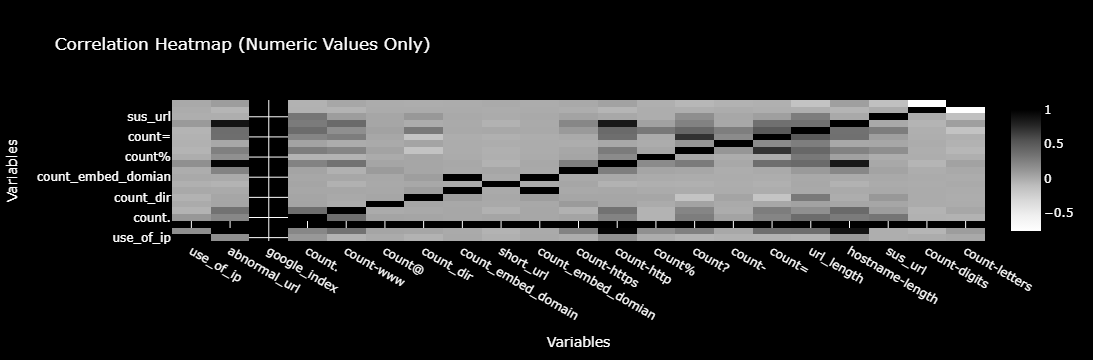

In [27]:
from plotly import graph_objects as go
numeric_data = df.select_dtypes(include='number')

corr_matrix = numeric_data.corr()

heatmap = go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Greys',  
)


layout = go.Layout(
    title='Correlation Heatmap (Numeric Values Only)',
    xaxis=dict(title='Variables'),
    yaxis=dict(title='Variables'),
    plot_bgcolor='black', 
    paper_bgcolor='black', 
    font=dict(color='white')  
)


fig = go.Figure(data=heatmap, layout=layout)


fig.show()

In [28]:
def extract_pri_domain(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

In [29]:
df['pri_domain'] = df['url'].apply(lambda x: extract_pri_domain(x))

In [30]:
df.head()


url        type  use_of_ip  \
0                                   br-icloud.com.br    phishing          0   
1                mp3raid.com/music/krizz_kaliko.html      benign          0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0   
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0   

   abnormal_url  google_index  count.  count-www  count@  count_dir  \
0             0             1       2          0       0          0   
1             0             1       2          0       0          2   
2             0             1       2          0       0          3   
3             1             1       3          1       0          1   
4             1             1       2          0       0          1   

   count_embed_domain  ...  count%  count?  count-  count=  url_length  \
0                   0  ...       0       0       0       0          16   
1                   0  ...       0       0       1       0          35   
2                   0  ...       0       0       0       0          31   
3                   0  ...       0       1       2       4          88   
4                   0  ...       0       1       1       3         235   

   hostname-length  sus_url  count-digits  count-letters  pri_domain  
0                0        0             0              1        None  
1                0        0             0              1        None  
2                0        0             0              1        None  
3               21        0             0              1        None  
4               23        0             0              1        None  

[5 rows x 24 columns]

In [31]:
def get_url_region(primary_domain):
    ccTLD_to_region = {
    ".ac": "Ascension Island",
    ".ad": "Andorra",
    ".ae": "United Arab Emirates",
    ".af": "Afghanistan",
    ".ag": "Antigua and Barbuda",
    ".ai": "Anguilla",
    ".al": "Albania",
    ".am": "Armenia",
    ".an": "Netherlands Antilles",
    ".ao": "Angola",
    ".aq": "Antarctica",
    ".ar": "Argentina",
    ".as": "American Samoa",
    ".at": "Austria",
    ".au": "Australia",
    ".aw": "Aruba",
    ".ax": "Åland Islands",
    ".az": "Azerbaijan",
    ".ba": "Bosnia and Herzegovina",
    ".bb": "Barbados",
    ".bd": "Bangladesh",
    ".be": "Belgium",
    ".bf": "Burkina Faso",
    ".bg": "Bulgaria",
    ".bh": "Bahrain",
    ".bi": "Burundi",
    ".bj": "Benin",
    ".bm": "Bermuda",
    ".bn": "Brunei Darussalam",
    ".bo": "Bolivia",
    ".br": "Brazil",
    ".bs": "Bahamas",
    ".bt": "Bhutan",
    ".bv": "Bouvet Island",
    ".bw": "Botswana",
    ".by": "Belarus",
    ".bz": "Belize",
    ".ca": "Canada",
    ".cc": "Cocos Islands",
    ".cd": "Democratic Republic of the Congo",
    ".cf": "Central African Republic",
    ".cg": "Republic of the Congo",
    ".ch": "Switzerland",
    ".ci": "Côte d'Ivoire",
    ".ck": "Cook Islands",
    ".cl": "Chile",
    ".cm": "Cameroon",
    ".cn": "China",
    ".co": "Colombia",
    ".cr": "Costa Rica",
    ".cu": "Cuba",
    ".cv": "Cape Verde",
    ".cw": "Curaçao",
    ".cx": "Christmas Island",
    ".cy": "Cyprus",
    ".cz": "Czech Republic",
    ".de": "Germany",
    ".dj": "Djibouti",
    ".dk": "Denmark",
    ".dm": "Dominica",
    ".do": "Dominican Republic",
    ".dz": "Algeria",
    ".ec": "Ecuador",
    ".ee": "Estonia",
    ".eg": "Egypt",
    ".er": "Eritrea",
    ".es": "Spain",
    ".et": "Ethiopia",
    ".eu": "European Union",
    ".fi": "Finland",
    ".fj": "Fiji",
    ".fk": "Falkland Islands",
    ".fm": "Federated States of Micronesia",
    ".fo": "Faroe Islands",
    ".fr": "France",
    ".ga": "Gabon",
    ".gb": "United Kingdom",
    ".gd": "Grenada",
    ".ge": "Georgia",
    ".gf": "French Guiana",
    ".gg": "Guernsey",
    ".gh": "Ghana",
    ".gi": "Gibraltar",
    ".gl": "Greenland",
    ".gm": "Gambia",
    ".gn": "Guinea",
    ".gp": "Guadeloupe",
    ".gq": "Equatorial Guinea",
    ".gr": "Greece",
    ".gs": "South Georgia and the South Sandwich Islands",
    ".gt": "Guatemala",
    ".gu": "Guam",
    ".gw": "Guinea-Bissau",
    ".gy": "Guyana",
    ".hk": "Hong Kong",
    ".hm": "Heard Island and McDonald Islands",
    ".hn": "Honduras",
    ".hr": "Croatia",
    ".ht": "Haiti",
    ".hu": "Hungary",
    ".id": "Indonesia",
    ".ie": "Ireland",
    ".il": "Israel",
    ".im": "Isle of Man",
    ".in": "India",
     ".io": "British Indian Ocean Territory",
    ".iq": "Iraq",
    ".ir": "Iran",
    ".is": "Iceland",
    ".it": "Italy",
    ".je": "Jersey",
    ".jm": "Jamaica",
    ".jo": "Jordan",
    ".jp": "Japan",
    ".ke": "Kenya",
    ".kg": "Kyrgyzstan",
    ".kh": "Cambodia",
    ".ki": "Kiribati",
    ".km": "Comoros",
    ".kn": "Saint Kitts and Nevis",
    ".kp": "Democratic People's Republic of Korea (North Korea)",
    ".kr": "Republic of Korea (South Korea)",
    ".kw": "Kuwait",
    ".ky": "Cayman Islands",
    ".kz": "Kazakhstan",
    ".la": "Laos",
    ".lb": "Lebanon",
    ".lc": "Saint Lucia",
    ".li": "Liechtenstein",
    ".lk": "Sri Lanka",
    ".lr": "Liberia",
    ".ls": "Lesotho",
    ".lt": "Lithuania",
    ".lu": "Luxembourg",
    ".lv": "Latvia",
    ".ly": "Libya",
    ".ma": "Morocco",
    ".mc": "Monaco",
    ".md": "Moldova",
    ".me": "Montenegro",
    ".mf": "Saint Martin (French part)",
    ".mg": "Madagascar",
    ".mh": "Marshall Islands",
    ".mk": "North Macedonia",
    ".ml": "Mali",
    ".mm": "Myanmar",
    ".mn": "Mongolia",
    ".mo": "Macao",
    ".mp": "Northern Mariana Islands",
    ".mq": "Martinique",
    ".mr": "Mauritania",
    ".ms": "Montserrat",
    ".mt": "Malta",
    ".mu": "Mauritius",
    ".mv": "Maldives",
    ".mw": "Malawi",
    ".mx": "Mexico",
    ".my": "Malaysia",
    ".mz": "Mozambique",
    ".na": "Namibia",
    ".nc": "New Caledonia",
    ".ne": "Niger",
    ".nf": "Norfolk Island",
    ".ng": "Nigeria",
    ".ni": "Nicaragua",
    ".nl": "Netherlands",
    ".no": "Norway",
    ".np": "Nepal",
    ".nr": "Nauru",
    ".nu": "Niue",
    ".nz": "New Zealand",
    ".om": "Oman",
    ".pa": "Panama",
    ".pe": "Peru",
    ".pf": "French Polynesia",
    ".pg": "Papua New Guinea",
     ".ph": "Philippines",
    ".pk": "Pakistan",
    ".pl": "Poland",
    ".pm": "Saint Pierre and Miquelon",
    ".pn": "Pitcairn",
    ".pr": "Puerto Rico",
    ".ps": "Palestinian Territory",
    ".pt": "Portugal",
    ".pw": "Palau",
    ".py": "Paraguay",
    ".qa": "Qatar",
    ".re": "Réunion",
    ".ro": "Romania",
    ".rs": "Serbia",
    ".ru": "Russia",
    ".rw": "Rwanda",
    ".sa": "Saudi Arabia",
    ".sb": "Solomon Islands",
    ".sc": "Seychelles",
    ".sd": "Sudan",
    ".se": "Sweden",
    ".sg": "Singapore",
    ".sh": "Saint Helena",
    ".si": "Slovenia",
    ".sj": "Svalbard and Jan Mayen",
    ".sk": "Slovakia",
    ".sl": "Sierra Leone",
    ".sm": "San Marino",
    ".sn": "Senegal",
    ".so": "Somalia",
    ".sr": "Suriname",
    ".ss": "South Sudan",
    ".st": "São Tomé and Príncipe",
    ".sv": "El Salvador",
    ".sx": "Sint Maarten (Dutch part)",
    ".sy": "Syria",
    ".sz": "Eswatini",
    ".tc": "Turks and Caicos Islands",
    ".td": "Chad",
    ".tf": "French Southern Territories",
    ".tg": "Togo",
    ".th": "Thailand",
    ".tj": "Tajikistan",
    ".tk": "Tokelau",
    ".tl": "Timor-Leste",
    ".tm": "Turkmenistan",
    ".tn": "Tunisia",
    ".to": "Tonga",
    ".tr": "Turkey",
    ".tt": "Trinidad and Tobago",
    ".tv": "Tuvalu",
    ".tw": "Taiwan",
    ".tz": "Tanzania",
    ".ua": "Ukraine",
    ".ug": "Uganda",
    ".uk": "United Kingdom",
    ".us": "United States",
    ".uy": "Uruguay",
    ".uz": "Uzbekistan",
    ".va": "Vatican City",
    ".vc": "Saint Vincent and the Grenadines",
    ".ve": "Venezuela",
    ".vg": "British Virgin Islands",
    ".vi": "U.S. Virgin Islands",
    ".vn": "Vietnam",
    ".vu": "Vanuatu",
    ".wf": "Wallis and Futuna",
    ".ws": "Samoa",
    ".ye": "Yemen",
    ".yt": "Mayotte",
    ".za": "South Africa",
    ".zm": "Zambia",
    ".zw": "Zimbabwe"
    }
    
    for ccTLD in ccTLD_to_region:
        if primary_domain.endswith(ccTLD):
            return ccTLD_to_region[ccTLD]
    
    return "Global"

In [32]:
df['url_region'] = df['pri_domain'].apply(lambda x: get_url_region(str(x)))

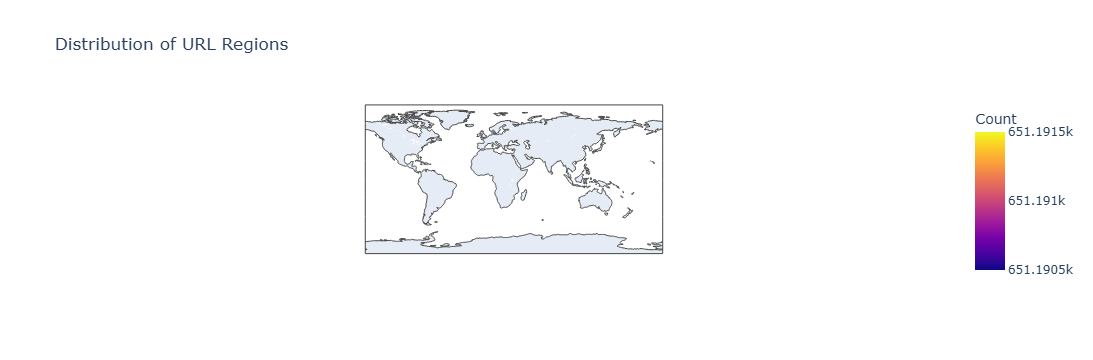

In [193]:
region_counts = df['url_region'].value_counts()

if 'Global' not in region_counts.index:
    region_counts['Global'] = 0

data = pd.DataFrame({'region': region_counts.index, 'count': region_counts.values})

colorscale = 'YlOrRd'  

fig = go.Figure(data=go.Choropleth(
    locations=data['region'],
    z=data['count'],
    locationmode='country names',
    colorscale=colorscale,
    autocolorscale=True,  
    marker_line_color='white',
    colorbar_title='Count'
))


fig.update_layout(title_text='Distribution of URL Regions')

fig.show()

In [34]:
!pip install tld

In [35]:
#importing parsing libraries 

from urllib.parse import urlparse
from tld import get_tld
import os.path

def first_length(url):
    urlpath = urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0
df['first_length']=df['url'].apply(lambda i: first_length(i))

#length of the top most domain

df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))

def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length']= df ['tld'].apply(lambda i : tld_length(i))

          

In [36]:
df= df.drop("tld",axis=1)


In [37]:
df.columns

Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'google_index', 'count.',
       'count-www', 'count@', 'count_dir', 'count_embed_domain', 'short_url',
       'count_embed_domian', 'count-https', 'count-http', 'count%', 'count?',
       'count-', 'count=', 'url_length', 'hostname-length', 'sus_url',
       'count-digits', 'count-letters', 'pri_domain', 'url_region',
       'first_length', 'tld_length'],
      dtype='object')

In [38]:
df['type'].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

EDA on the data 

Distribution od use_of_ip

In [41]:
import seaborn as sns
sns.set(style='whitegrid')
plot=sns.countplot(data = df, y="type", hue="use_of_ip")

Distribution of Google Index

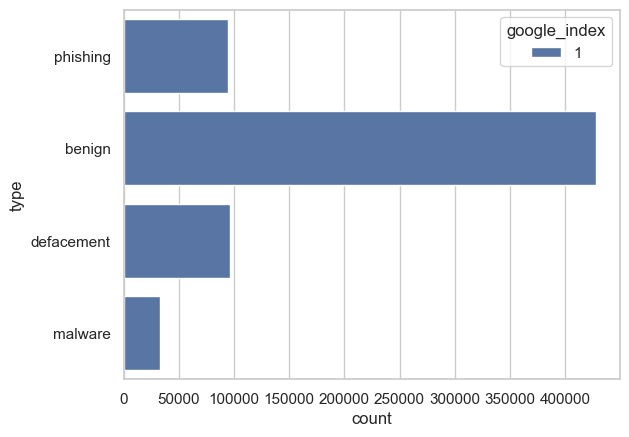

In [43]:
sns.set(style='whitegrid')
plot=sns.countplot(y="type",data=df,hue="google_index")

Distribution of abnormal url

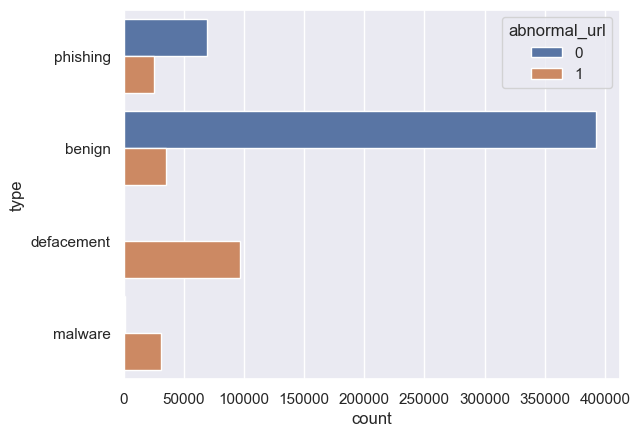

In [45]:
sns.set(style = "darkgrid")
plot = sns.countplot(y='type', data=df , hue="abnormal_url")

Distribution of Short URL 

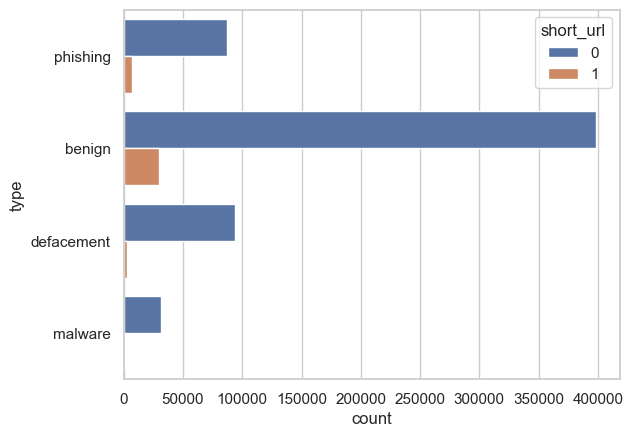

In [47]:
sns.set(style="whitegrid")
plot=sns.countplot(y="type", data=df , hue="short_url")

Distribution of Suspicious URL

In [49]:
sns.set(style="whitegrid")
plot=sns.countplot(y="type", data = df , hue = "sus_url")

In [50]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count.", kind="box", data=df)

Distribution of www

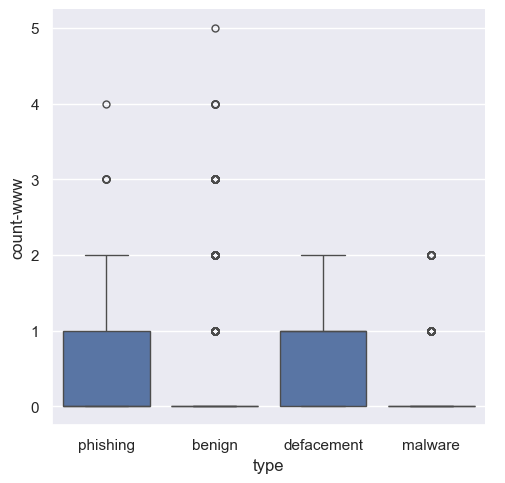

In [52]:
sns.set(style="darkgrid")
plot=sns.catplot(y="count-www", x="type", kind="box", data = df)

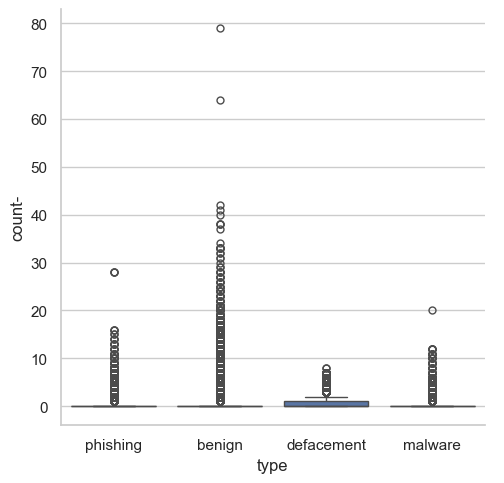

In [53]:
sns.set(style="whitegrid")
plot= sns.catplot(y="count-", x="type", kind="box", data=df)

Distribution of count_dir

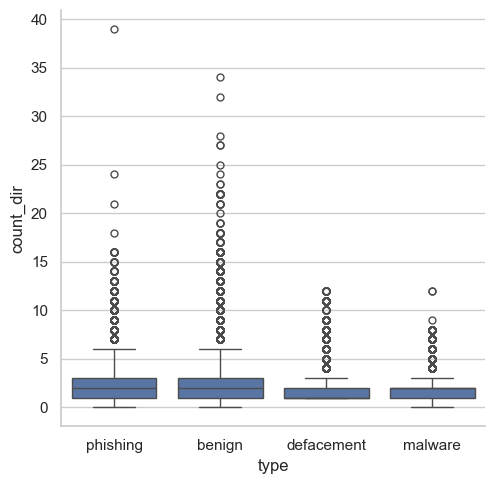

In [55]:
sns.set(style="whitegrid")
plot=sns.catplot(x="type",y="count_dir", kind="box", data=df)

Distribution of count @

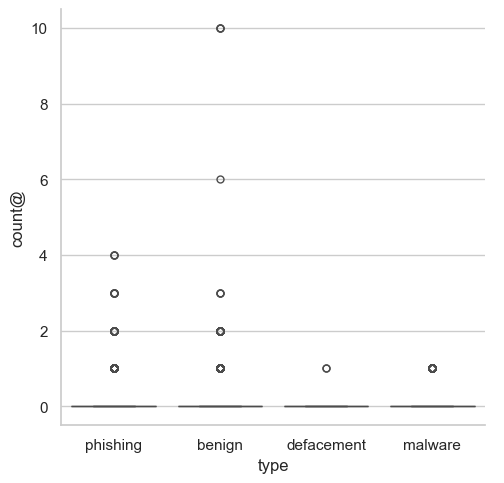

In [57]:
sns.set(style="whitegrid")
plot=sns.catplot(x="type",y="count@", kind="box", data =df)

Hostname length - Distribution 

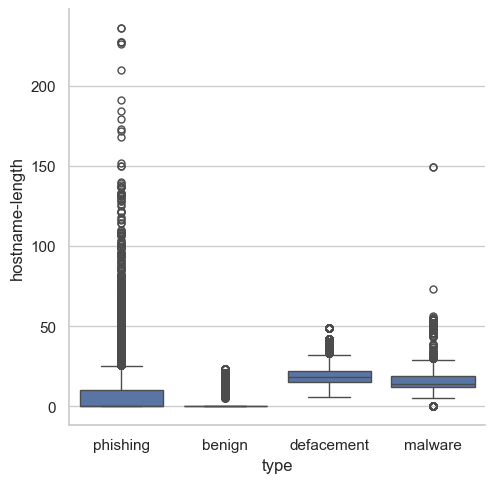

In [59]:
sns.set(style="whitegrid")
plot=sns.catplot(x="type", y = "hostname-length", kind="box", data=df)

first directory  length _ Distribution 

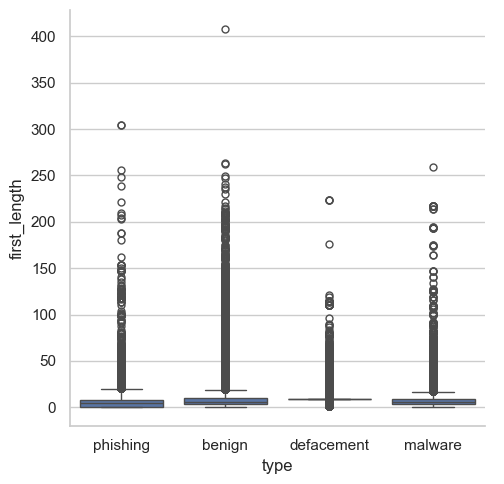

In [61]:
sns.set(style="whitegrid")
plot = sns.catplot(x="type", y= "first_length", kind="box",data=df)

DIstribution of top-level domain and its length

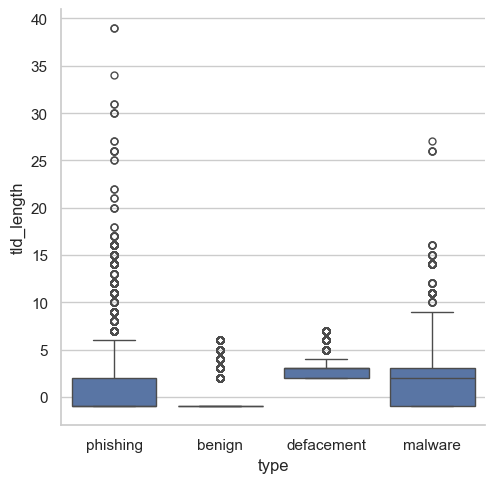

In [63]:
sns.set(style="whitegrid")
plot=sns.catplot(x="type", y="tld_length",kind="box",data=df)

TARGET ENCODING 

In [65]:
from sklearn.preprocessing import LabelEncoder

lb_make =LabelEncoder()
df["type_code"]=lb_make.fit_transform(df["type"])
df["type_code"].value_counts()

type_code
0    428103
1     96457
3     94111
2     32520
Name: count, dtype: int64

In [66]:
#Predictor Variables
# filtering out google_index as it has only 1 value
x = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname-length', 'sus_url', 'first_length', 'tld_length', 'count-digits',
       'count-letters']]

#Target Variable
y = df['type_code']

In [67]:
x.head()

use_of_ip  abnormal_url  count.  count-www  count@  count_dir  \
0          0             0       2          0       0          0   
1          0             0       2          0       0          2   
2          0             0       2          0       0          3   
3          0             1       3          1       0          1   
4          0             1       2          0       0          1   

   count_embed_domian  short_url  count-https  count-http  ...  count?  \
0                   0          0            0           0  ...       0   
1                   0          0            0           0  ...       0   
2                   0          0            0           0  ...       0   
3                   0          0            0           1  ...       1   
4                   0          0            0           1  ...       1   

   count-  count=  url_length  hostname-length  sus_url  first_length  \
0       0       0          16                0        0             0   
1       1       0          35                0        0             5   
2       0       0          31                0        0             7   
3       2       4          88               21        0             9   
4       1       3         235               23        0             9   

   tld_length  count-digits  count-letters  
0          -1             0              1  
1          -1             0              1  
2          -1             0              1  
3           2             0              1  
4           3             0              1  

[5 rows x 21 columns]

In [68]:
x.columns

Index(['use_of_ip', 'abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname-length', 'sus_url', 'first_length', 'tld_length',
       'count-digits', 'count-letters'],
      dtype='object')

Train Test Split 

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
x_train ,x_test,y_train,y_test = train_test_split(x, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

1) Random forest Classifier

In [174]:
from sklearn.ensemble import RandomForestClassifier
rforest=RandomForestClassifier(n_estimators = 100, max_features='sqrt')
rforest.fit(x_train,y_train)
y_pred=rforest.predict(x_test)
print(classification_report(y_test,y_pred,target_names=['benign','defacement','phishing','malware']))
scores =accuracy_score(y_test,y_pred)
print("accuracy: %0.3f"% scores)

              precision    recall  f1-score   support

      benign       0.97      0.98      0.98     85621
  defacement       0.98      0.99      0.98     19292
    phishing       0.98      0.94      0.96      6504
     malware       0.90      0.85      0.87     18822

    accuracy                           0.96    130239
   macro avg       0.96      0.94      0.95    130239
weighted avg       0.96      0.96      0.96    130239

accuracy: 0.963


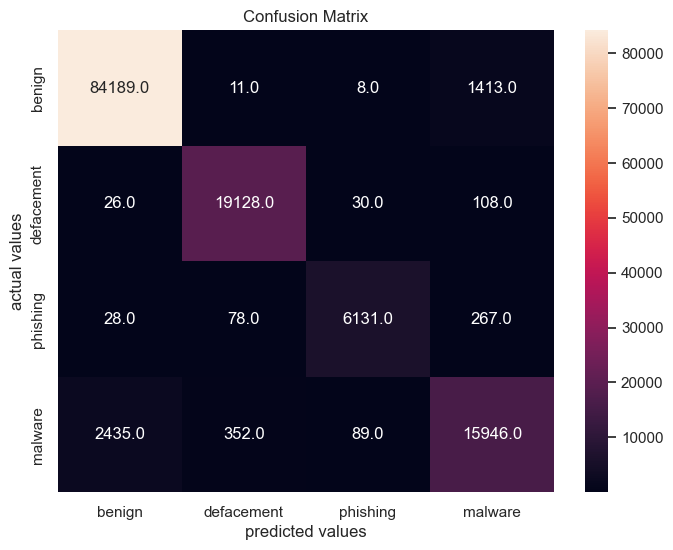

In [178]:
cm = confusion_matrix(y_test ,y_pred)
cm_df = pd.DataFrame(cm , index = ['benign','defacement','phishing','malware'],
                 columns = ['benign','defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df,annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()



In [73]:
light_gbm =LGBMClassifier(objective='multiclass',boosting_type="gbdt",n_jobs=5,
                         silent=True,random_state=5)
lgb_C=light_gbm.fit(x_train,y_train)
y_pred_light_gbm=lgb_C.predict(x_test)

print(classification_report(y_test,y_pred_light_gbm,target_names=['benign','defacement','phishing','malware']))
score=accuracy_score(y_test,y_pred_light_gbm)
print('accuracy: %0.3f'%score)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 738
[LightGBM] [Info] Number of data points in the train set: 520952, number of used features: 21
[LightGBM] [Info] Start training from score -0.419439
[LightGBM] [Info] Start training from score -1.909712
[LightGBM] [Info] Start training from score -2.996946
[LightGBM] [Info] Start training from score -1.934324
[LightGBM] [Warning] Unknown parameter: silent
              precision    recall  f1-score   support

      benign       0.97      0.98      0.98     85621
  defacement       0.95      0.99      0.97     19292
    phishing       0.97      0.89      0.93      6504
     malware       0.89      0.81      0.85     18822

    accuracy      

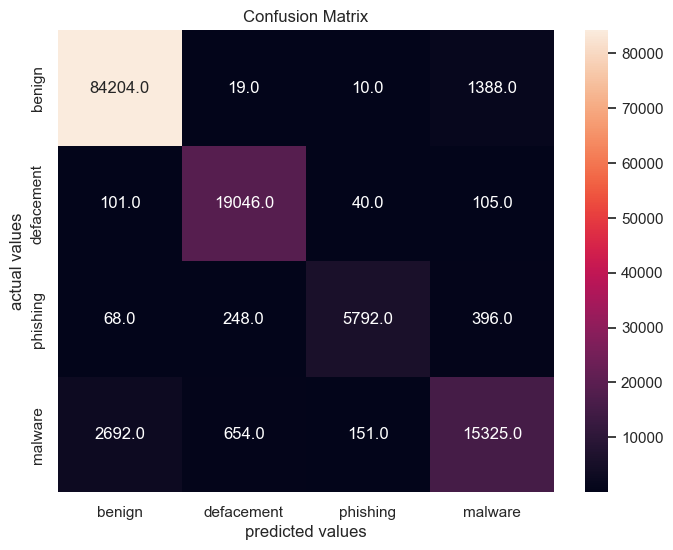

In [180]:
cm = confusion_matrix(y_test ,y_pred_light_gbm)
cm_df = pd.DataFrame(cm , index = ['benign','defacement','phishing','malware'],
                 columns = ['benign','defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df,annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()

XGboost Classifier

In [182]:
xgb_c = xgb.XGBClassifier(n_estimators= 110)
xgb_c.fit(x_train,y_train)
y_pred=xgb_c.predict(x_test)
print(classification_report(y_test,y_pred,target_names=['benign','defacement','phishing','malware']))

score=accuracy_score(y_test,y_pred)
print("accuracy: %0.3f" % score)

              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85621
  defacement       0.96      0.99      0.97     19292
    phishing       0.97      0.90      0.93      6504
     malware       0.90      0.82      0.86     18822

    accuracy                           0.96    130239
   macro avg       0.95      0.92      0.94    130239
weighted avg       0.96      0.96      0.96    130239

accuracy: 0.958


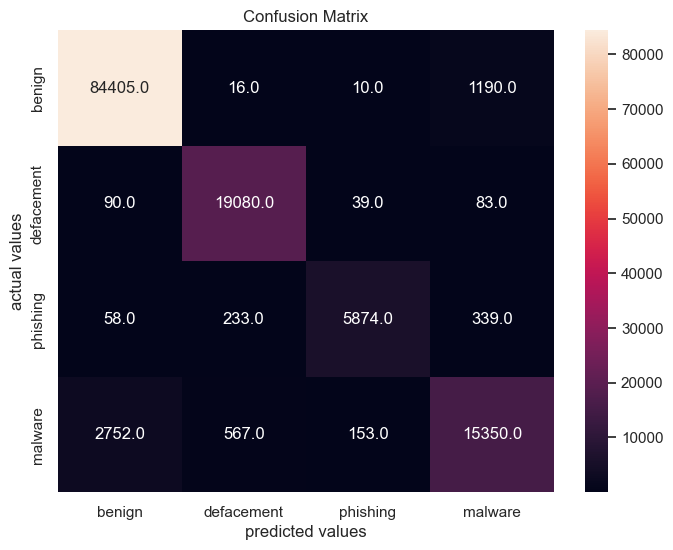

In [184]:
cm = confusion_matrix(y_test ,y_pred)
cm_df = pd.DataFrame(cm , index = ['benign','defacement','phishing','malware'],
                 columns = ['benign','defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df,annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()

In [76]:
#Predictor Variables
# filtering out google_index as it has only 1 value
x = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname-length', 'sus_url', 'first_length', 'tld_length', 'count-digits',
       'count-letters']]

#Target Variable
y = df['type_code']

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
x_train ,x_test,y_train,y_test = train_test_split(x, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

# Define the classifiers
classifiers = [
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    ExtraTreesClassifier(),
    GaussianNB()
]

# Dictionary to store results
results = []

# Loop through each classifier and evaluate
for classifier in classifiers:
    # Create a pipeline
    pipeline = Pipeline([
        ('classifier', classifier)
    ])
    
    # Fit the classifier
    pipeline.fit(x_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(x_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append results
    results.append({
        'Classifier': classifier.__class__.__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Print results
for result in results:
    print(f"{result['Classifier']}:")
    print(f"  Accuracy: {result['Accuracy']:.3f}")
    print(f"  Precision: {result['Precision']:.3f}")
    print(f"  Recall: {result['Recall']:.3f}")
    print(f"  F1 Score: {result['F1 Score']:.3f}")
    print("-" * 40)


C:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



DecisionTreeClassifier:
  Accuracy: 0.957
  Precision: 0.957
  Recall: 0.957
  F1 Score: 0.957
----------------------------------------
AdaBoostClassifier:
  Accuracy: 0.312
  Precision: 0.785
  Recall: 0.312
  F1 Score: 0.366
----------------------------------------
KNeighborsClassifier:
  Accuracy: 0.944
  Precision: 0.943
  Recall: 0.944
  F1 Score: 0.943
----------------------------------------
ExtraTreesClassifier:
  Accuracy: 0.962
  Precision: 0.962
  Recall: 0.962
  F1 Score: 0.962
----------------------------------------
GaussianNB:
  Accuracy: 0.811
  Precision: 0.819
  Recall: 0.811
  F1 Score: 0.802
----------------------------------------


In [78]:

def main(url):
    
    status = []
    
    status.append(having_ip_address(url))
    status.append(abnormal_url(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))
    
    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))
    
    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))
    
    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(first_length(url))
    tld = get_tld(url,fail_silently=True)
      
    status.append(tld_length(tld))
        
    

    return status

In [79]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    # Due to updates to scikit-learn, we now need a 2D array as a parameter to the predict function.
    features_test = np.array(features_test).reshape((1, -1))

    

    pred = light_gbm.predict(features_test)
    if int(pred[0]) == 0:
        
        res="SAFE"
        return res
    elif int(pred[0]) == 1.0:
        
        res="DEFACEMENT"
        return res
    elif int(pred[0]) == 2.0:
        res="PHISHING"
        return res
        
    elif int(pred[0]) == 3.0:
        
        res="MALWARE"
        return res

In [80]:
urls = ['titaniumcorporate.co.za','en.wikipedia.org/wiki/North_Dakota']
for url in urls:
     print(get_prediction_from_url(url))

[LightGBM] [Warning] Unknown parameter: silent
MALWARE
[LightGBM] [Warning] Unknown parameter: silent
SAFE


In [148]:
urls =['br-icloud.com.br']
for url in urls :
    print(get_prediction_from_url(url))

[LightGBM] [Warning] Unknown parameter: silent
MALWARE


In [150]:
urls =['http://www.garage-pirenne.be/index.php?option=com_content&view=article&id=15&Itemid=16']
for url in urls :
    print(get_prediction_from_url(url))

[LightGBM] [Warning] Unknown parameter: silent
DEFACEMENT


In [186]:
urls =['cloudsignin.cloud']
for url in urls :
    print(get_prediction_from_url(url))

[LightGBM] [Warning] Unknown parameter: silent
MALWARE


In [190]:
urls =['mp3raid.com/music/krizz_kaliko.html','http://adventure-nicaragua.net/index.php?option=com_content&view=article&id=15&Itemid=16']
for url in urls :
    print(get_prediction_from_url(url))

[LightGBM] [Warning] Unknown parameter: silent
SAFE
[LightGBM] [Warning] Unknown parameter: silent
DEFACEMENT


In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
from keras.callbacks import ModelCheckpoint
import pandas as pd

In [23]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (16, )))

model.add(Dense(16, activation='relu'))

model.add(Dense(8, activation='relu')) 

model.add(Dense(1, activation='sigmoid')) 
model.summary()

C:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,217 (4.75 KB)

 Trainable params: 1,217 (4.75 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
df=pd.read_csv('malicious_phish.csv.zip')
print(df.shape)

(651191, 2)


In [32]:
#Independent Variables
x = df[['hostname_length',
       'path_length', 'fd_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

#Dependent Variable
y = df['result']

KeyError: "None of [Index(['hostname_length', 'path_length', 'fd_length', 'count-', 'count@',\n       'count?', 'count%', 'count.', 'count=', 'count-http', 'count-https',\n       'count-www', 'count-digits', 'count-letters', 'count_dir', 'use_of_ip'],\n      dtype='object')] are in the [columns]"

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
x_train ,x_test,y_train,y_test = train_test_split(x, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [15]:
opt = keras.optimizers.Adam()
model.compile(optimizer= opt ,loss='binary_crossentropy',metrics=['acc'])
checkpointer = ModelCheckpoint('url.keras', monitor='val_acc', mode='max', verbose=2, save_best_only=True)
history=model.fit(x_train, y_train, batch_size=256, epochs=5, validation_data=(x_test, y_test), callbacks=[checkpointer])

NameError: name 'x_train' is not defined